In [1]:
import pandas as pd
star_wars = pd.read_csv("OneDrive\Documents\my_datasets\Star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.loc[:,'Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars.loc[:,'Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars.loc[:,'Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [10]:
new_col = {
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4' : 'seen_2',
    'Unnamed: 5' : 'seen_3',
    'Unnamed: 6' : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6',
}
star_wars = star_wars.rename(new_col, axis=1)

In [12]:
import numpy as np
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [21]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [26]:
new_cols = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6'
}
star_wars = star_wars.rename(new_cols, axis=1)

In [49]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

<BarContainer object of 6 artists>

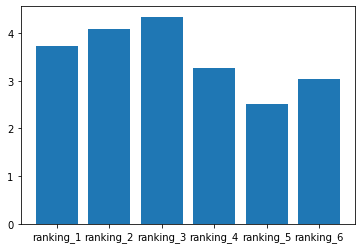

In [47]:
import matplotlib.pyplot as plt
plt.bar(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean())

Jusqu'à présent, nous avons nettoyé les données, renommé plusieurs colonnes et calculé le classement moyen de chaque film. Comme je le soupçonnais, il semble que les films «originaux» soient bien mieux notés que les plus récents.

<BarContainer object of 6 artists>

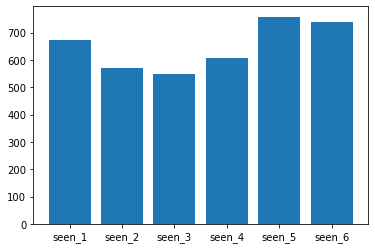

In [45]:
plt.bar(star_wars.columns[3:9], star_wars[star_wars.columns[3:9]].sum())

In [50]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

Il semble que les films originaux ont été vus par plus de répondants que les films plus récents. Cela renforce ce que nous avons vu dans les classements, où les films précédents semblent être plus populaires.

In [51]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

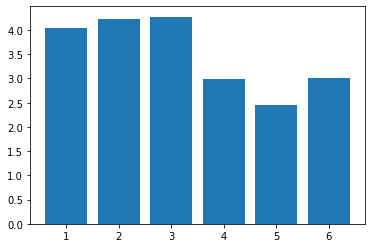

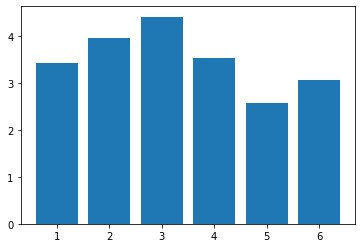

In [52]:
plt.bar(range(1,7), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(1,7), females[females.columns[9:15]].mean())
plt.show()

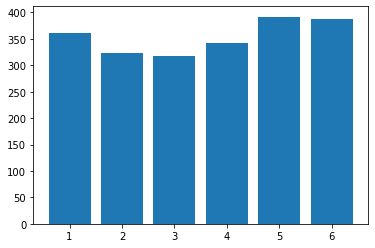

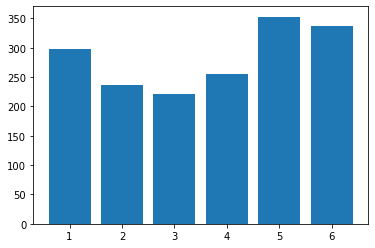

In [54]:
plt.bar(range(1,7), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(1,7), females[females.columns[3:9]].sum())
plt.show()

Intéressant, plus d'hommes regardent les épisodes 1 à 3, mais les hommes les apprécient beaucoup moins que les femmes